In [61]:
#get the data
import pandas as pd
taxi_trips = pd.read_csv('https://raw.githubusercontent.com/1122131uhi/1122131_DataAnalytics/master/results-20200720-204551.csv')
from sklearn.preprocessing import MinMaxScaler

#Scale the target attribute
mms = MinMaxScaler()
taxi_trips[['NUM_TRIPS']] = mms.fit_transform(taxi_trips[['NUM_TRIPS']])


taxi_trips.head(10)

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
0,4,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,0.259593
1,5,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,0.394563
2,6,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,0.548558
3,7,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,0.369311
4,1,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,0.378594
5,2,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,0.533940
6,3,2009,1,7,2009-01-07,33.4,31.0,1005.1,4.3,5.2,11.1,999.9,46.9,28.4,0.45,999.9,1,0.378985
7,4,2009,1,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1,0.671727
8,5,2009,1,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0,0.790915
9,6,2009,1,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0,0.687808


In [62]:
from category_encoders import TargetEncoder

#split the data into x and y datasets, because its the only way I know how to use the TargetEncoder's fit_transform method. 
x = taxi_trips.drop('NUM_TRIPS', axis=1)
y = taxi_trips['NUM_TRIPS']

#encode the day attribute
enc = TargetEncoder(cols=['day'])
converted = enc.fit_transform(x, y)
converted.head(10)

c:\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog
0,0.734068,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0
1,0.771084,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0
2,0.703735,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0
3,0.503134,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0
4,0.490991,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0
5,0.641412,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0
6,0.677085,2009,1,7,2009-01-07,33.4,31.0,1005.1,4.3,5.2,11.1,999.9,46.9,28.4,0.45,999.9,1
7,0.734068,2009,1,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1
8,0.771084,2009,1,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0
9,0.703735,2009,1,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0


In [64]:
import matplotlib.pyplot as plt

#recombine the dataset
converted['num_trips'] = y
converted.head(10)


,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,num_trips
0,0.734068,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,0.259593
1,0.771084,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,0.394563
2,0.703735,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,0.548558
3,0.503134,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,0.369311
4,0.490991,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,0.378594
5,0.641412,2009,1,6,2009-01-06,30.4,17.8,1015.4,14.4,5.7,12.0,999.9,35.6,26.6,0.00,1.2,0,0.533940
6,0.677085,2009,1,7,2009-01-07,33.4,31.0,1005.1,4.3,5.2,11.1,999.9,46.9,28.4,0.45,999.9,1,0.378985
7,0.734068,2009,1,8,2009-01-08,37.9,30.7,989.8,9.7,16.4,27.0,35.0,48.2,32.0,0.65,999.9,1,0.671727
8,0.771084,2009,1,9,2009-01-09,25.7,12.4,1006.3,15.0,13.8,20.0,26.0,33.1,21.2,0.00,999.9,0,0.790915
9,0.703735,2009,1,10,2009-01-10,21.6,9.6,1021.9,14.5,6.9,20.0,999.9,28.9,15.8,99.99,999.9,0,0.687808


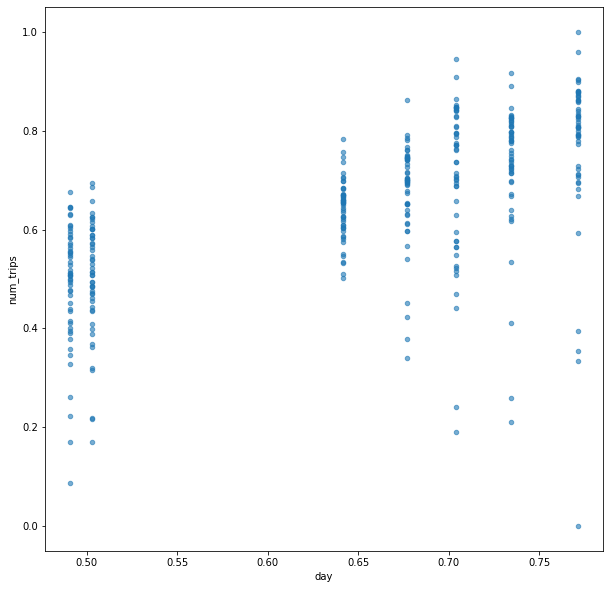

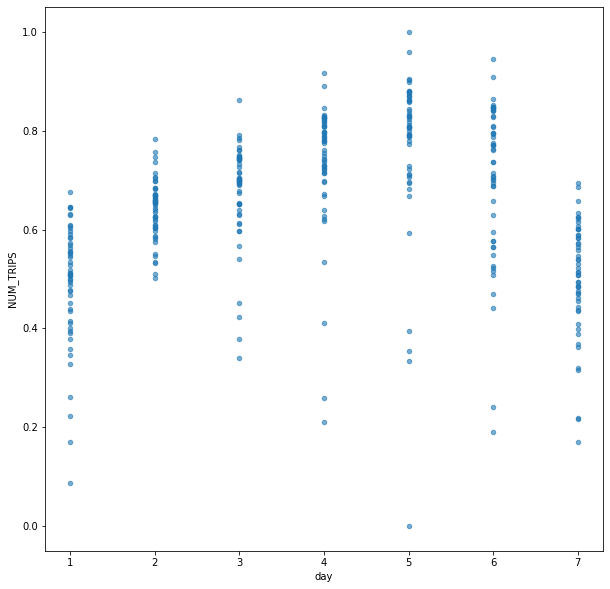

In [65]:
#compare encoded data v categorical data scatterplots.
converted.plot(kind='scatter', y='num_trips', x='day', alpha=0.6, figsize=(10, 10))
taxi_trips.plot(kind='scatter', y='NUM_TRIPS', x='day', alpha=0.6, figsize=(10, 10))
plt.show()